# Analise de Dados do Airbnb ( Porto - Portugal )
O Airbnb já é considerado como sendo maior empresa hoteleira da atualidade. Ah, o detalhe é que não possui nenhum hotel! 
Conectando pessoas que querem viajar (e se Hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, creiando essa conecção inovadora de hospedagem alternativa.         

In [1]:
# importa bibliotecas 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Obtenção dos dados csv ou etc...
df = pd.read_csv("https://data.insideairbnb.com/portugal/norte/porto/2025-09-21/visualisations/listings.csv")

#### Analise dos dados

In [3]:

# Analise inicial dos dados as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,69.0,2,33,2025-09-09,0.22,1,98,8,29049/AL
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17418,-8.35533,Entire home/apt,NaN,5,21,2025-08-30,0.17,3,0,1,7563/AL
2,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17622,-8.35351,Entire home/apt,NaN,5,20,2025-08-31,0.16,3,0,5,7563/AL
3,87873,Oporto Apartment Triplex,480980,Paula,PORTO,Bonfim,41.15607,-8.60437,Entire home/apt,108.0,3,266,2025-09-14,1.64,4,317,17,634/AL
4,94701,Big TERRACE APARTMENT / city center,505473,Gundega,PORTO,Bonfim,41.14675,-8.60186,Entire home/apt,73.0,3,315,2025-09-15,1.80,1,342,12,85541/AL


#### Descricao dos dados / Variaveis

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número do id do anfitrião 
* host_name - nome do anfitrião
* neighbourhood_grup - grupo de vizinhança 
* neighbourhood - vizinhança
* latitude - eixo `y` norte sul  
* longitude - eixo `x` leste oeste
* room_type - tipo de sala 
* price - preço 
* minimum_nights - noites minimas 
* number_of_reviews - numero de avaliação  
* last_reviews - ultima avaliação 
* reviews_per_month - avaliação por mês 
* calculated_host_listings - lista de anfitrião calculada 
* availability_ 365 - disponibilidade 365
* number_of_reviws - numero de avaliações 
* license -licença


## Q1. Quantos **atributos** (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

In [4]:
# identificar o volume de dados no dataframe
print("Entradas:\t {}".format(df.shape[0]))
print("Atributos:\t {}".format(df.shape[1]))

Entradas:	 14806
Atributos:	 18


In [5]:
# Verificar os tipos de dados das variáveis
display(df.dtypes)

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


## Q2. Qual a porcentagem de valores ausentes no dataset?
A qualidade de um dataset está diretamente ligado a quantidades de **dados** e valores **ausentes**. É importante entender logo no inicio se esses valores nulos são realmente nulos ex: erro de importação ou dados faltantes. 


In [6]:
# visualizar a porcentagem de valores ausentes dos atributos no dataset
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
price,0.109010
reviews_per_month,0.101378
last_review,0.101378
license,0.019316
host_name,0.000068
id,0.000000
name,0.000000
neighbourhood,0.000000
neighbourhood_group,0.000000
host_id,0.000000


## Q3. Qual o tipo de distribuição das variaveis?

Para identificar as distribuição das variáveis, irei plotar o histograma.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

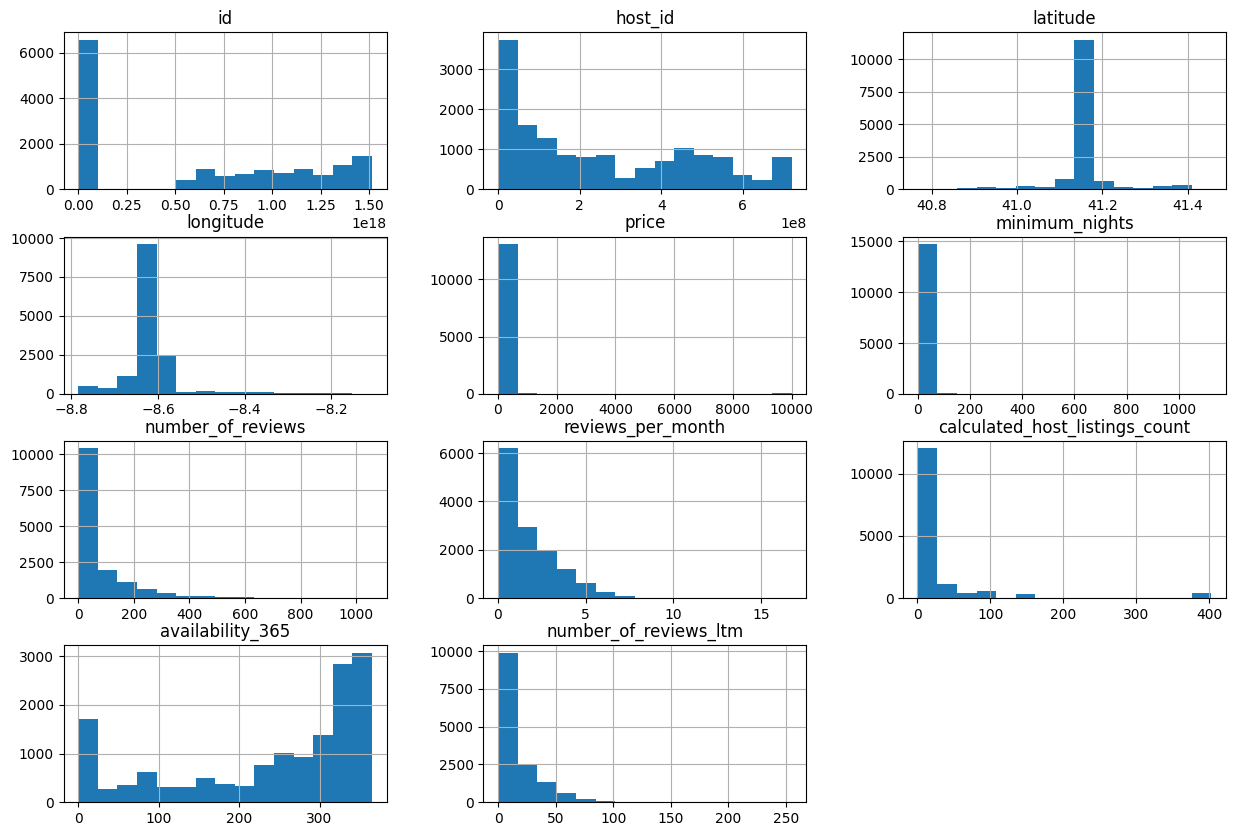

In [7]:
# plotar o histograma das variaveis numéricas
df.hist(bins=15, figsize=(15,10))

## Q4. Qual a média dos preços do aluguel? Qual a correlação existente entre duas variáveis? 

In [8]:
# ver média dos preços da coluna 'price' 
df['price'].mean()

np.float64(142.48620375985445)

In [9]:
# criar uma matriz de correlações
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.008821,-0.045973,-0.056277,-0.010021,0.048290
minimum_nights,-0.008821,1.000000,-0.030552,-0.042056,-0.018431,-0.036721
number_of_reviews,-0.045973,-0.030552,1.000000,0.577239,-0.098697,0.040813
reviews_per_month,-0.056277,-0.042056,0.577239,1.000000,-0.036696,0.132840
calculated_host_listings_count,-0.010021,-0.018431,-0.098697,-0.036696,1.000000,0.099705
availability_365,0.048290,-0.036721,0.040813,0.132840,0.099705,1.000000


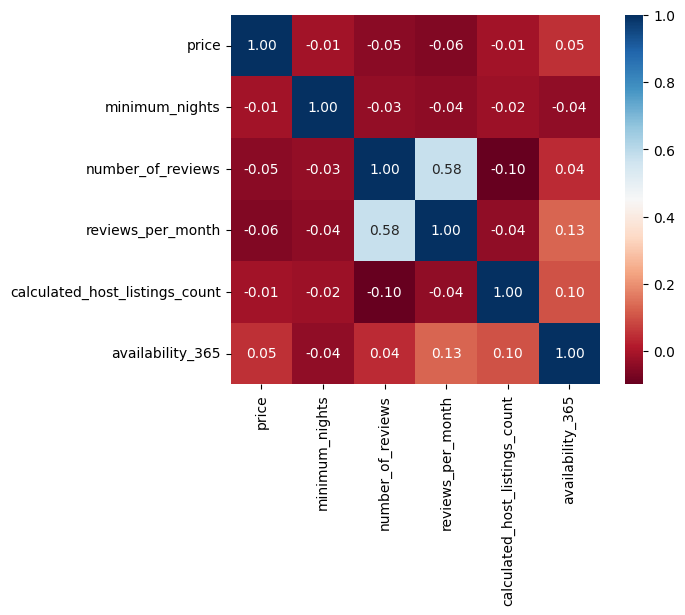

In [10]:
# visualizar matrix de correlações com um heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Q5. Mostrar o tipo de imovel mais alugado no Airbnb?

In [11]:
# mostar a quantidade de cada tipo de imovel mais alugado no Airbnb
df.room_type.value_counts()

,count
room_type,
Entire home/apt,12288
Private room,2344
Shared room,120
Hotel room,54


In [12]:
# mostrar a porcetagem de cada tipo de imóvel disponivel no Airbnb
df.room_type.value_counts() / df.shape[0]

,count
room_type,
Entire home/apt,0.829934
Private room,0.158314
Shared room,0.008105
Hotel room,0.003647


##  Q6. Qual o tipo de imovel mais alugado no Airbnb?

In [13]:
# ver preço por bairros, na média 
df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

,price
neighbourhood,
Guilhabreu,4831.500000
São Martinho da Gândara,3074.666667
"Vila Chã, Codal e Vila Cova de Perrinho",2033.400000
Santa Eulália,1577.428571
Rio Mau e Arcos,1417.875000
...,...
Baguim do Monte (Rio Tinto),27.666667
Aves,27.000000
Lourosa,NaN


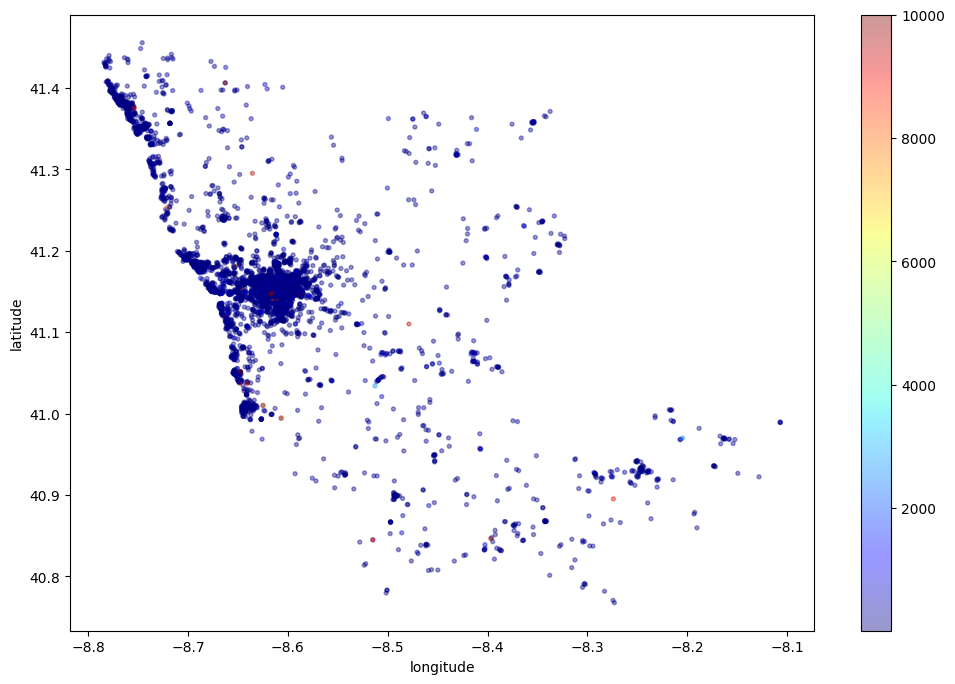

In [14]:
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

#### Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?

In [ ]:
# ver a média da coluna `minimum_nights`
df = df['minimum_nights'].mean()

In [ ]:
df

np.float64(3.8832230176955287)

### **Briefing Executivo: Análise de Dados do Airbnb no Porto**

**1. Resumo Executivo**
A análise do mercado de Airbnb no Porto revela uma forte concentração em aluguéis de "Casa/Apto Inteiro", com preços significativamente mais altos em bairros específicos. A qualidade dos dados apresenta desafios, como valores ausentes e extremos (outliers), que impactam a precisão das médias de preço e noites mínimas, indicando a necessidade de um tratamento de dados para análises futuras.

**2. Insights Estratégicos**
*   **Tendência de Mercado:** A esmagadora maioria dos imóveis listados (mais de 75%) são casas ou apartamentos inteiros, mostrando uma clara preferência por privacidade e autonomia tanto por parte dos anfitriões quanto dos hóspedes.
*   **Oportunidade Geográfica:** Existe uma nítida valorização por localização, com bairros como "Lordelo do Ouro e Massarelos" e a região da Foz apresentando os preços médios mais elevados. Isso indica oportunidades para estratégias de precificação segmentadas.
*   **Ponto de Atenção:** A análise de médias de preço e noites mínimas é distorcida por valores extremos. Por exemplo, listagens com mais de 1000 noites mínimas ou preços muito acima da média podem inflacionar os indicadores e levar a conclusões equivocadas.

**3. Recomendações Práticas**
1.  **Foco em Segmento de Alta Demanda:** Direcionar estratégias de marketing e aquisição para anfitriões com "Casas/Aptos Inteiros", que representam o núcleo do mercado no Porto.
2.  **Implementar Precificação Inteligente:** Desenvolver um modelo de precificação dinâmica que considere o bairro como variável principal, ajustando os valores para competir de forma mais eficaz nas áreas de alta valorização.
3.  **Melhorar a Qualidade da Análise:** Antes de futuras decisões, aplicar um filtro para remover outliers (ex: 1% dos valores mais altos para `price` e `minimum_nights`) para garantir que as métricas reflitam a realidade do mercado.

**4. Visualização**
*   O **mapa de dispersão geográfico** é a ferramenta visual mais poderosa desta análise, mostrando claramente onde os imóveis de maior valor estão concentrados.
*   O **heatmap de correlação** oferece um resumo rápido sobre como variáveis como disponibilidade e número de avaliações se relacionam com o preço.